# Task-2 To Explore Supervised Machine Learning
## Student Score Prediction
  ###                In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

# Importing Important Libraries

In [2]:
import numpy as np               #Numpy(Numerical Python) used for performing mathematical and logical operation on Arrays.
import pandas as pd              #Pandas(panel data) is being used here for data exploration and modeling.
import matplotlib.pyplot as plt  #Matplotlib is a comprehensive library for creating static, animated, and interactive visualization.
import seaborn as sns            #Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

# Importing Dataset

In [3]:
data=pd.read_csv("D:/Big Data Analytics/Dataset/student_scores - student_scores.csv")

In [4]:
data.head()       #head() method is used to return top n(5 by default)rows of data frame.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape         #To check the number of rows and columns in dataset.

(25, 2)

In [6]:
data.isnull().sum()          #Counting of Null Values in Our Dataset.

Hours     0
Scores    0
dtype: int64

In [7]:
data.info()              #Getting information about Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualizing Dataset

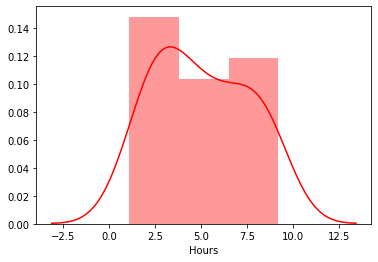

In [8]:
sns.distplot(data['Hours'],color='r')           #The most convenient way to take a quick look at a univariate distribution in
                                                    #seaborn is the distplot() function. By default, this will draw a histogram 
                                                      #and fit a kernel density estimate (KDE).

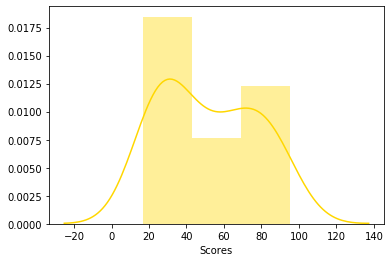

In [9]:
sns.distplot(data['Scores'],color='gold')

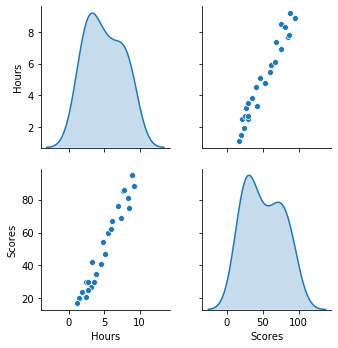

In [10]:
sns.pairplot(data, diag_kind="kde",kind='scatter',palette='hue')    #To plot multiple pairwise bivariate distributions in a
                                                                         #dataset, you can use the pairplot() function.

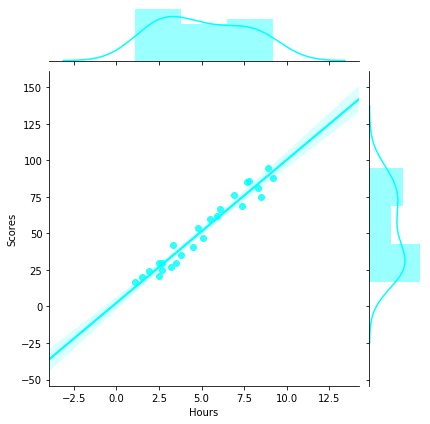

In [11]:
sns.jointplot(x='Hours', y='Scores' , data=data , kind='reg', color='cyan')    #Ceates a multi-panel figure that shows both 
                                                                            #bivariate relationship between two variables along
                                                                   #with the univariate distribution of each on separate axes.

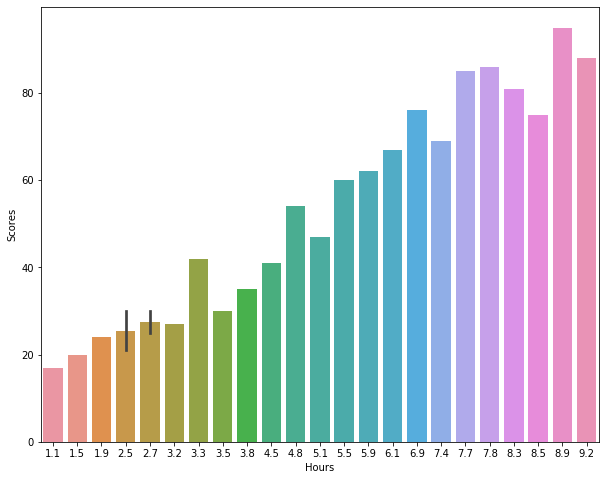

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Hours'],y=data['Scores'])

# Splitting Data into Training set and Testing set

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

## Dividing The Training set as 80% and Testing set as 20%

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

## Appling Linear regression algorithm for prediction

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


## Training the Simple linear Regression model on the Training Set 

In [16]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(lr.intercept_)

2.018160041434683


In [18]:
line = lr.coef_*x+lr.intercept_

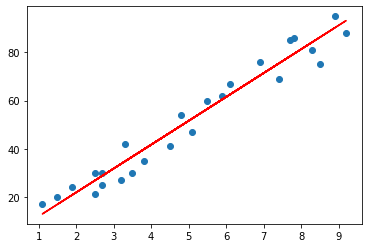

In [19]:
plt.scatter(x, y)
plt.plot(x, line, color='r');
plt.show()

# Predicting the scores

In [20]:
print(x_test)
y_pred = lr.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Checking the accuracy of model

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

## Predicting score for 9.25 hours

In [23]:
Hours = [[9.25]]
own_pred = lr.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
